In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [2]:
df = pd.read_csv('data_science_asia_clean.csv',index_col=0)

In [3]:
df.head(10)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,('University Courses (resulting in a universit...,"('Kaggle (notebooks, competitions, etc)',)",Master’s degree,1-3 years,"('Python', 'SQL')","(' PyCharm ', ' Jupyter Notebook')","('None',)","(' Matplotlib ', ' Seaborn ')",1-2 years,"(' Scikit-learn ',)","('Linear or Logistic Regression', 'Decision Tr...","('No, I do not download pre-trained model weig...",NaN
2,174,25-29,Woman,China,Yes,"('Kaggle Learn Courses', 'University Courses (...","('University courses', 'Online courses (Course...",Master’s degree,< 1 years,"('Python', 'MATLAB')","(' Visual Studio ', ' MATLAB ', ' Jupyter Note...","('Colab Notebooks', 'Google Cloud Vertex AI Wo...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"('Udemy',)","('Online courses (Coursera, EdX, etc)',)",Master’s degree,3-5 years,"('Python',)","(' Visual Studio Code (VSCode) ', ' Jupyter No...","(' Kaggle Notebooks', 'Colab Notebooks')","(' Seaborn ',)",2-3 years,"(' Scikit-learn ', ' PyTorch ', ' Xgboost ', ...","('Decision Trees or Random Forests', 'Dense Ne...","(' Huggingface Models ',)","('Kaggle (notebooks, forums, etc)',)"
4,283,22-24,Woman,China,Yes,('University Courses (resulting in a universit...,"('University courses', 'Social media platforms...",I prefer not to answer,< 1 years,"('Python', 'MATLAB', 'Other')","(' Visual Studio ', ' PyCharm ', ' MATLAB ')","('Google Cloud Vertex AI Workbench ',)","('None',)",Under 1 year,"(' TensorFlow ',)","('None',)","('Other storage services (i.e. google drive)',)","('Other',)"
5,492,40-44,Man,Japan,No,"('Kaggle Learn Courses',)","('Video platforms (YouTube, Twitch, etc)', 'Ka...",No formal education past high school,< 1 years,"('Python',)","(' Notepad++ ', ' Jupyter Notebook')","('None',)","('None',)",I do not use machine learning methods,NaN,NaN,NaN,"('Kaggle (notebooks, forums, etc)',)"
6,985,30-34,Man,Japan,No,('University Courses (resulting in a universit...,"('University courses', 'Kaggle (notebooks, com...",Master’s degree,5-10 years,"('Python', 'R', 'SQL', 'Java', 'Javascript', '...","('JupyterLab ', ' RStudio ', ' Visual Studio '...","('Colab Notebooks', ' Amazon Sagemaker Studio ...","(' Matplotlib ', ' Seaborn ')",3-4 years,"(' Scikit-learn ', ' Keras ', ' PyTorch ', ' ...","('Linear or Logistic Regression', 'Decision Tr...","(' PyTorch Hub ', ' Huggingface Models ', ' Ti...","('Twitter (data science influencers)', ""Email ..."
7,299,25-29,Man,South Korea,Yes,('University Courses (resulting in a universit...,"('University courses', 'Video platforms (YouTu...",Master’s degree,1-3 years,"('Python', 'R')","(' Visual Studio ', ' PyCharm ', ' Jupyter Not...","(' Kaggle Notebooks', 'Colab Notebooks')","(' Matplotlib ', ' Seaborn ')",1-2 years,"(' TensorFlow ', ' Keras ', ' Xgboost ', ' Li...","('Decision Trees or Random Forests', 'Gradient...","('No, I do not download pre-trained model we

In [4]:
df.columns

Index(['Duration', 'What is your age (# years)?', 'What is your gender?',
       'In which country do you currently reside?',
       'Are you currently a student?',
       'On which platforms have you begun or completed data science courses?',
       'What products or platforms did you find to be most helpful when you first started studying data science?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'For how many years have you been writing code and/or programming?',
       'What programming languages do you use on a regular basis?',
       'Which of the following integrated development environments (IDE's) do you use on a regular basis?',
       'Do you use any of the following hosted notebook products?',
       'Do you use any of the following data visualization libraries on a regular basis?',
       'For how many years have you used machine learning methods?',
       'Which of the following machine 

In [5]:
age = 'What is your age (# years)?'
gender = 'What is your gender'
country = 'In which country do you currently reside?'
education = 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

Vẽ phân phối tuổi

In [6]:
def age_distribute(ax, country,data):
    data_age = df[age].value_counts().sort_index()
    ax.bar(data.index, data, width=0.55, 
       edgecolor='darkgray', color='#d4dddd',
       linewidth=0.7)
    ax.set_title('Age Distribution of {}'.format(country))
    ax.grid(axis='y', linestyle='-', alpha=0.5)    


In [7]:
age_country = df.groupby([country,age])[age].count()

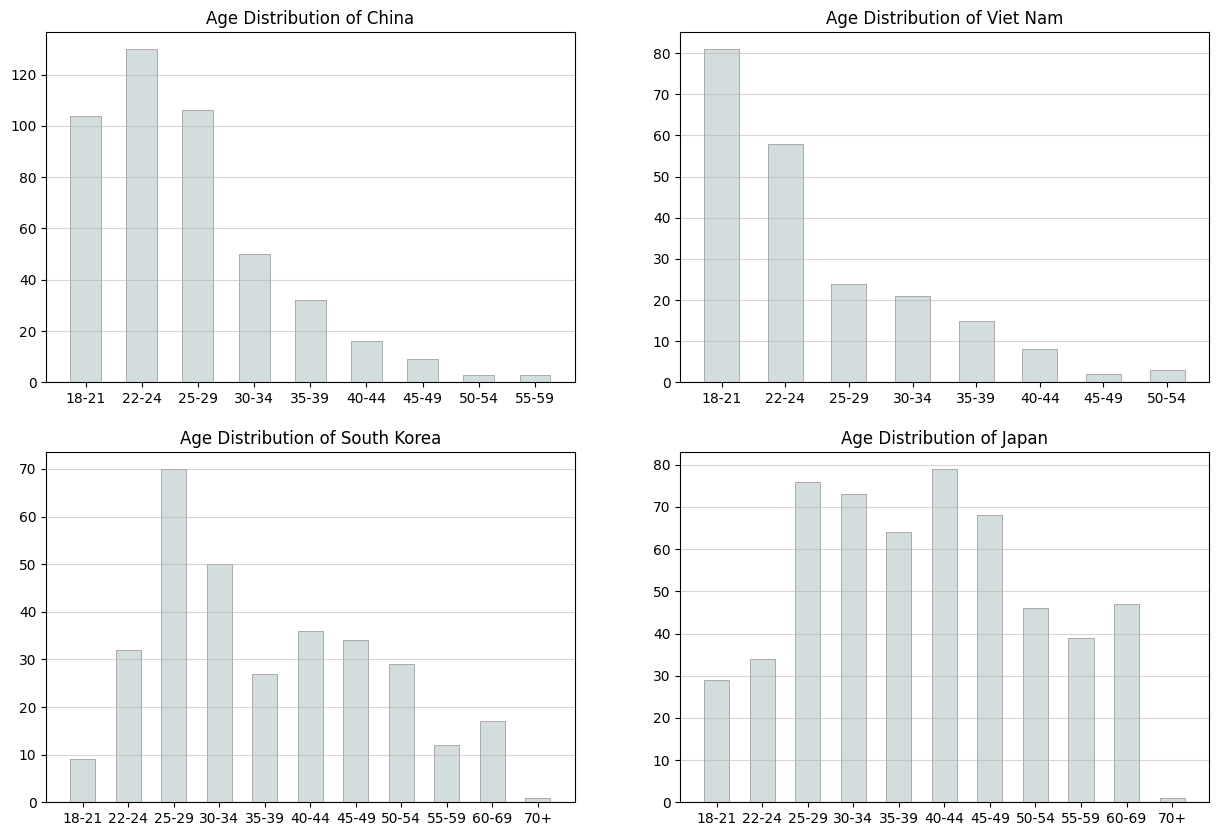

In [8]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
ax_flat = ax.flatten()
age_distribute(ax_flat[0],'China',age_country.loc['China'])
age_distribute(ax_flat[1],'Viet Nam',age_country.loc['Viet Nam'])
age_distribute(ax_flat[2],'South Korea',age_country.loc['South Korea'])
age_distribute(ax_flat[3],'Japan',age_country.loc['Japan'])
plt.show()

- Ta nhận thấy ở Việt Nam và Trung Quốc thì số lượng lao động trẻ rất cao (từ 18 - 24), trong khi đó số lượng lao động có kinh nghiệm với giảm nhanh và ít hơn rất nhiều. Điều này chứng tỏ đây là 2 thị trường khá là mới và tiềm năng của ngành này. Tuy nhiên ở thị trường Việt Nam thì số lượng lao động có kinh nghiệm lại ít hơn khá nhiều nên lo sợ việc chất lượng lao động được đào tạo bài bản không cao.
- Ở Hàn và Nhật thì lại trái ngược lại khi số lượng lao động có kinh nghiệm lại nhiều hơn số lượng lao động trẻ, có thể là do xu hướng già hoá dân số ở hai nước này và có vẻ như ngành DS đã qua thời kì hot ở hai nước này. Tuy nhiên số lượng lao động có kinh nghiệm của họ lại rất nhiều, cho thấy rằng chất lượng nhân sự của họ rất tốt, đây sẽ là hai thị trường tuy không còn hot nhưng chất lượng lại vô cùng tốt.

In [9]:
edu = df.groupby([country,education])[education].count()
edu

In which country do you currently reside?  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
China                                      Bachelor’s degree                                                                                                   93
                                           Doctoral degree                                                                                                     53
                                           I prefer not to answer                                                                                              38
                                           Master’s degree                                                                                                    187
                                           No formal education past high school                                                                                15
                                   

In [21]:
def pie_pro(ax, country,data):
    sns.set_style("whitegrid")  # Đặt phong cách
    custom_colors = sns.color_palette("Set3", len(data))
    ax.pie(data.values, colors=custom_colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    ax.set_title('Age Distribution of {}'.format(country))
    

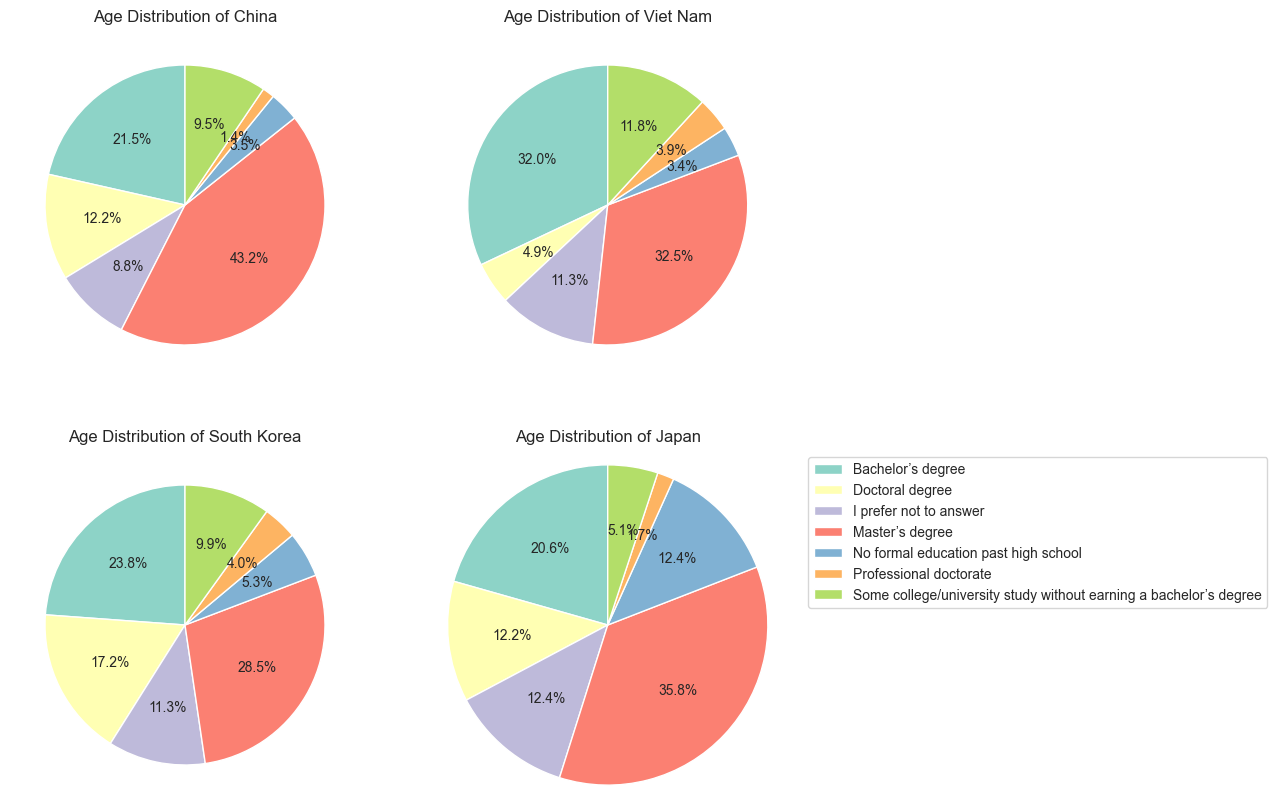

In [27]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax_flat = ax.flatten()
pie_pro(ax_flat[0],'China',edu.loc['China'])
pie_pro(ax_flat[1],'Viet Nam',edu.loc['Viet Nam'])
pie_pro(ax_flat[2],'South Korea',edu.loc['South Korea'])
pie_pro(ax_flat[3],'Japan',edu.loc['Japan'])
plt.legend(edu.loc['China'].index,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Ta nhận thấy rằng dù ở nước nào thì bằng Master đều chiếm phần lớn nhất, chứng tỏ rằng bằng Master là vô cùng quan trọng ở ngành DS. Tuy nhiên bằng tiến sĩ hay giáo sư lại ít hơn nhiều. Chứng tỏ bằng Master là để cho yêu cầu làm việc chứ không nhiều người muốn đi theo hướng nghiên cứu. Nhưng điều này cũng khẳng định rằng nếu bạn muốn làm trong ngành này thì yêu cầu về kiến thức là vô cùng cao.
- Ở Nhật Bản thì tỷ lệ người không học đại học nhưng ra làm ngành này là nhiều hơn hẳn so với 3 nước còn lại. Có thể ở thị trường Nhật Bản thì yêu cầu bằng cấp là không nhiều. Tuy nhiên tỷ lệ bằng Master cao chứng tỏ rằng nếu muốn có một công việc chắc ăn thì bạn cần học ở các cơ sở đào tạo chính quy
